<a href="https://colab.research.google.com/github/Tinonturja/Diabetes_dataset_model01/blob/main/Model1_(test_size_%3D30).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import sklearn

In [2]:
col_names = ["Feature 1","Feature 2","Feature 3","Feature 4","Feature 5","Feature 6","Feature 7","Feature 8","Diabetes Diagnosis"]

In [3]:
diabetes_dataset = pd.read_csv('/content/pima-indians-diabetes.csv',header=None,names =col_names)

In [4]:
#shapes of the dataFrame
diabetes_dataset.shape

(768, 9)

The Dataset has 768 samples and 8 features. The final column shows the output(detecting diabetes) of the dataset.

Here 1 inidicates that patient is diabatic, and 0 indicates the patient is free from diabetes.

In [5]:
#checking missing values
diabetes_dataset.isnull().sum()

,0
Feature 1,0
Feature 2,0
Feature 3,0
Feature 4,0
Feature 5,0
Feature 6,0
Feature 7,0
Feature 8,0
Diabetes Diagnosis,0


The dataset has no missing values

In [6]:
#All Statistical Values
diabetes_dataset.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Diabetes Diagnosis
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Feature 1           768 non-null    int64  
 1   Feature 2           768 non-null    int64  
 2   Feature 3           768 non-null    int64  
 3   Feature 4           768 non-null    int64  
 4   Feature 5           768 non-null    int64  
 5   Feature 6           768 non-null    float64
 6   Feature 7           768 non-null    float64
 7   Feature 8           768 non-null    int64  
 8   Diabetes Diagnosis  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Visualization

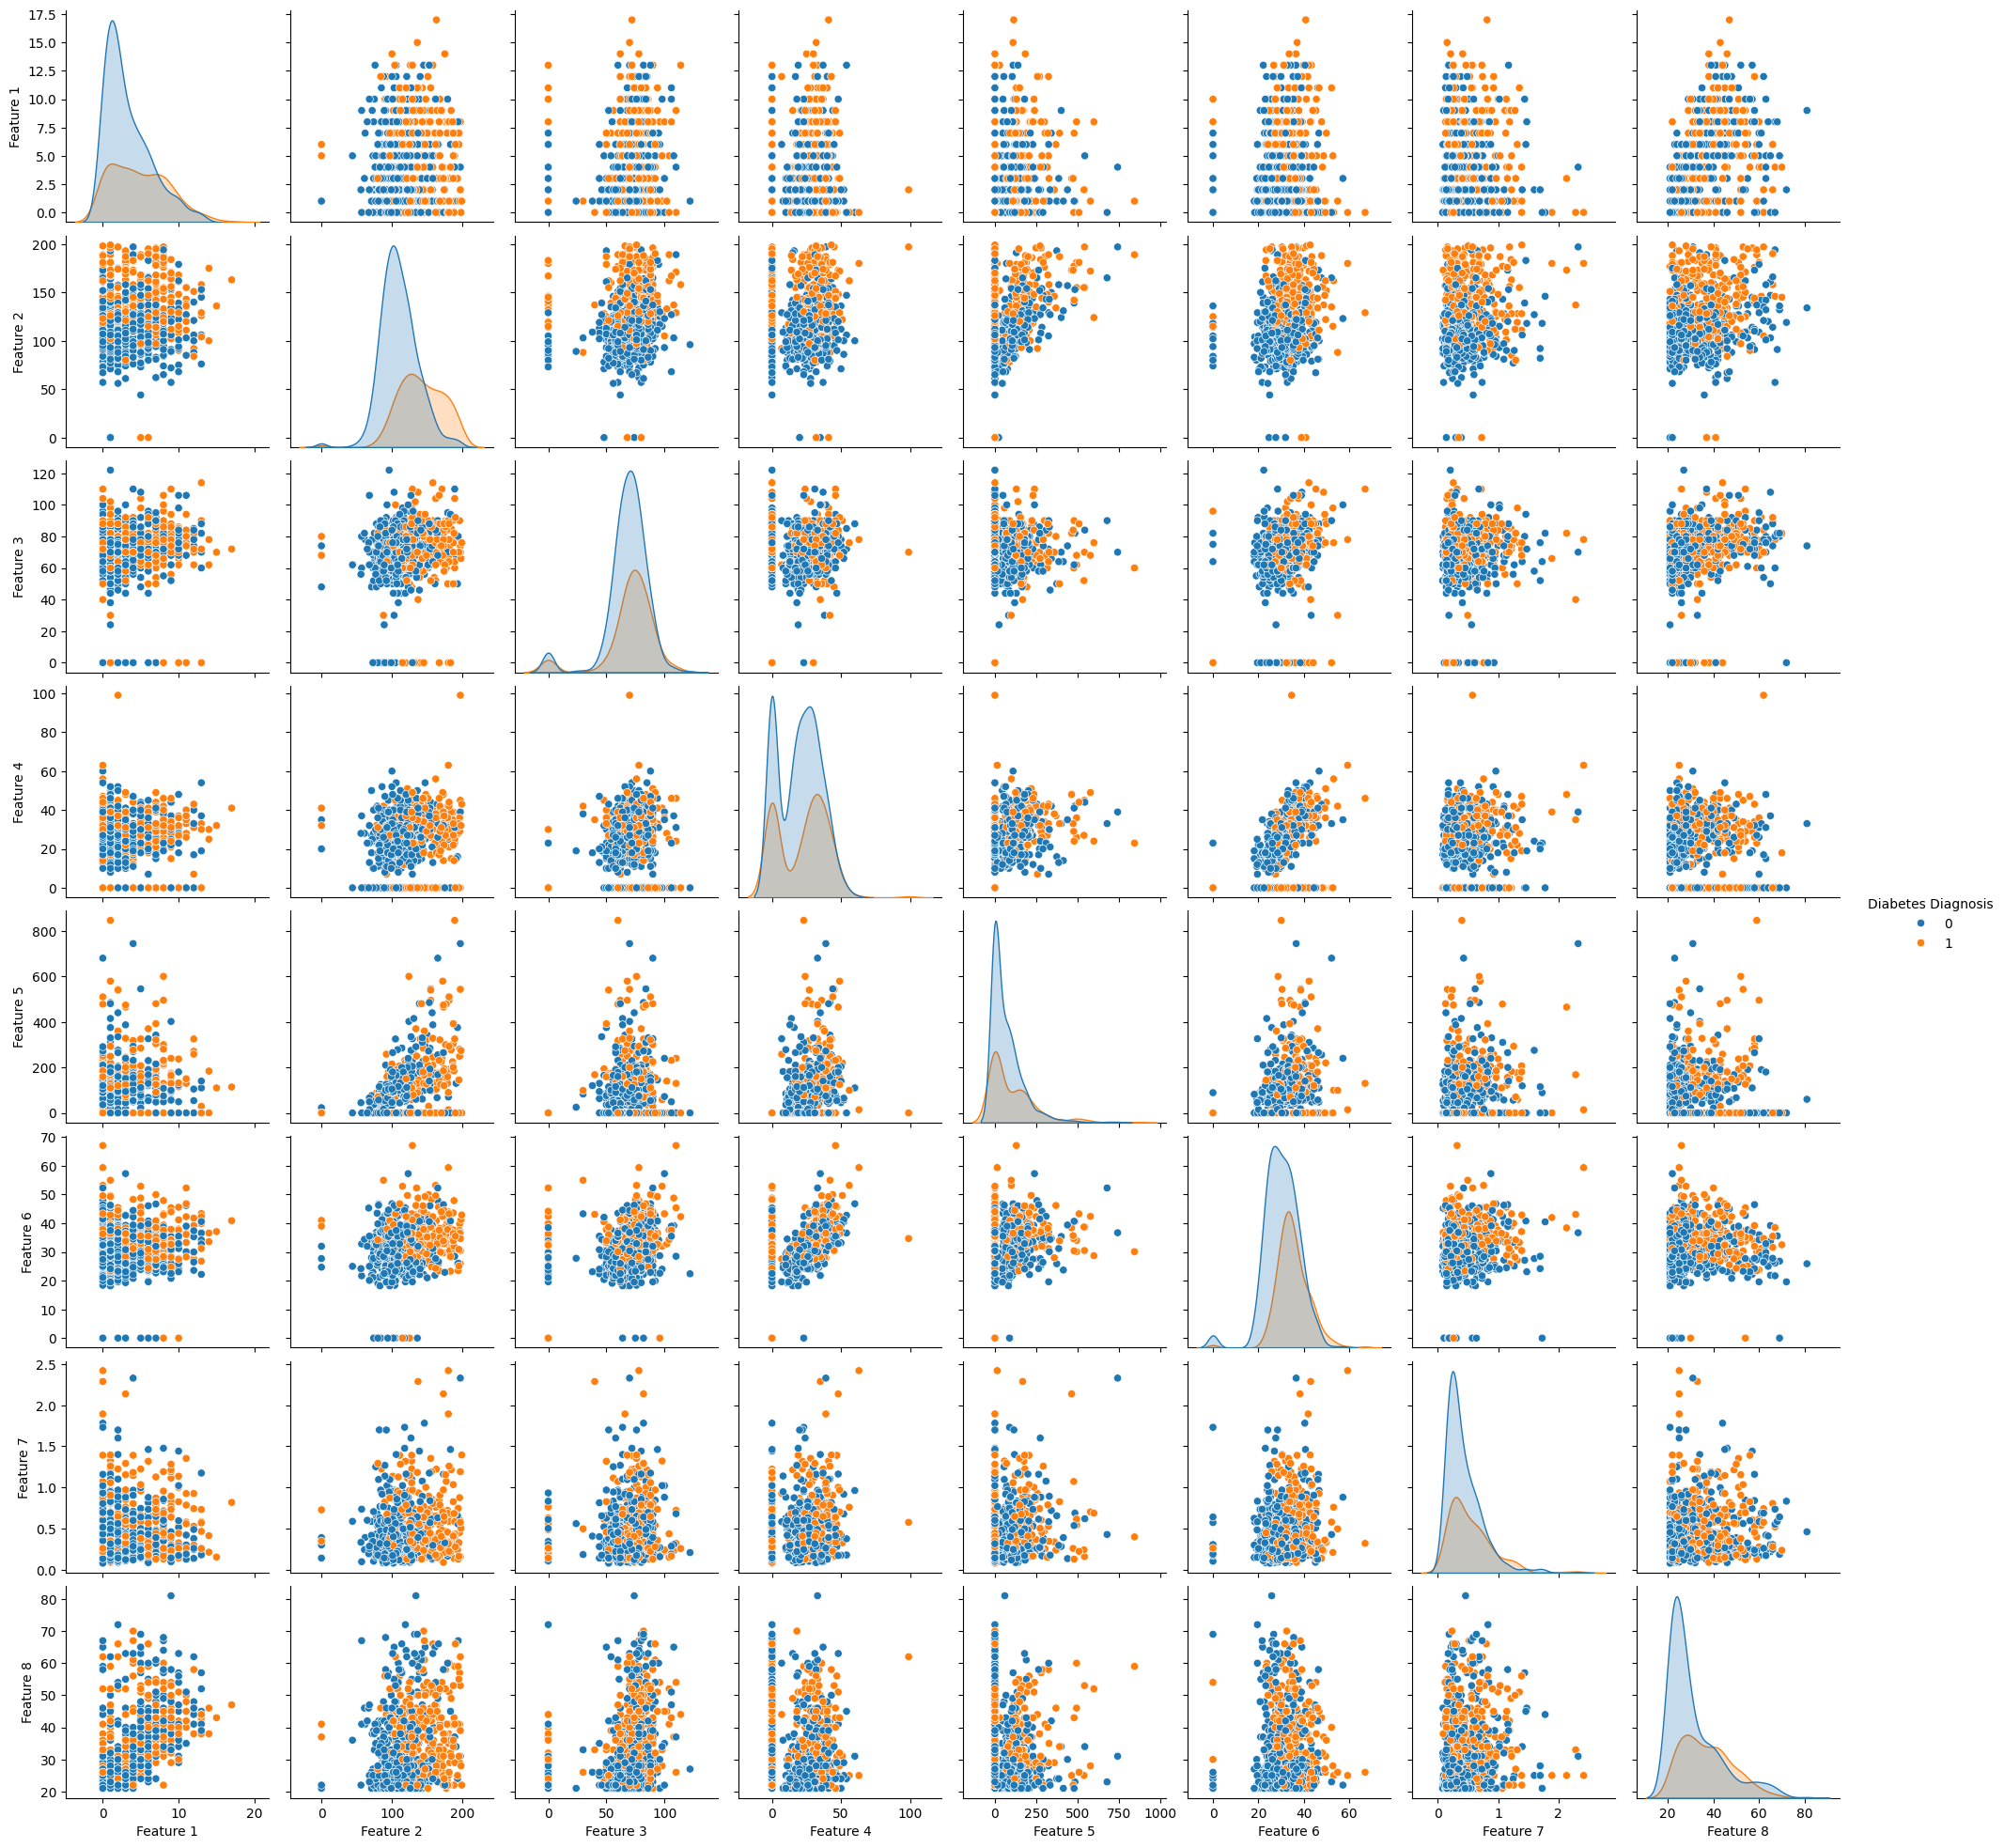

In [8]:
import seaborn as sns
# Pairplot
sns.pairplot(diabetes_dataset, hue="Diabetes Diagnosis")  # Replace with your classification column name
plt.show()


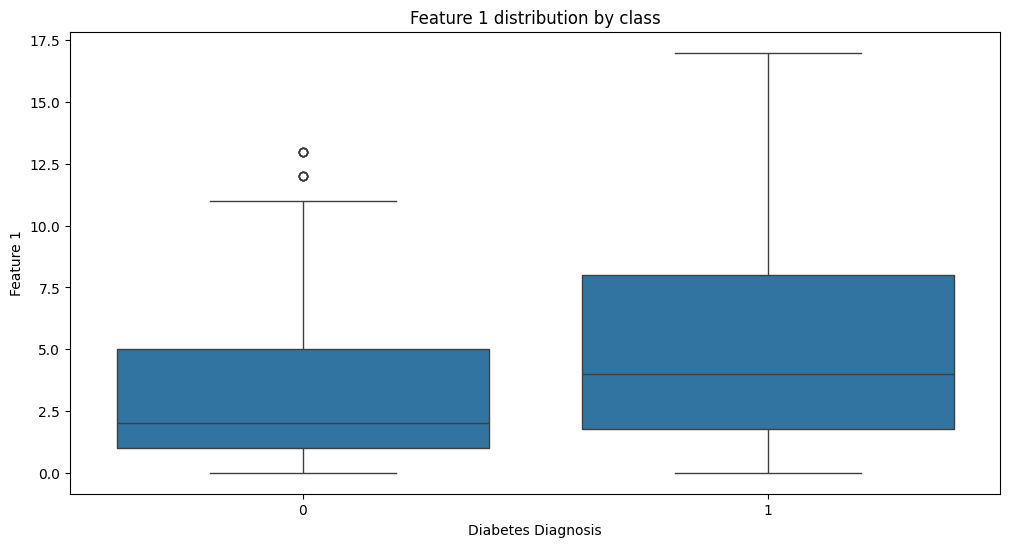

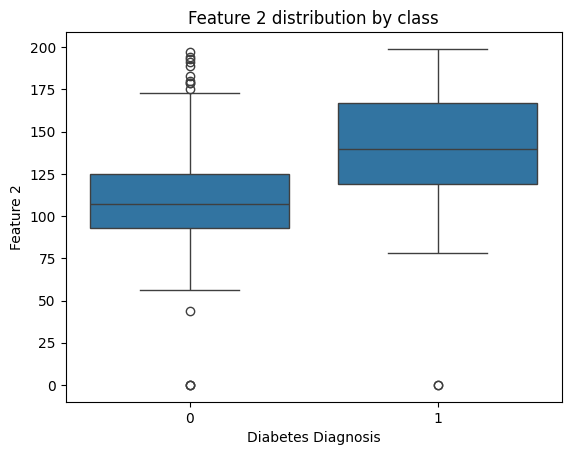

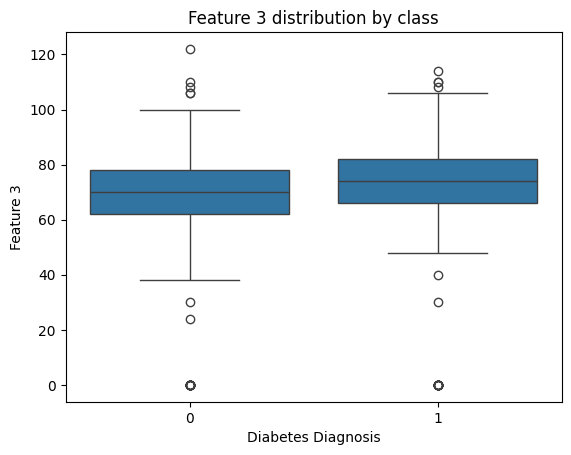

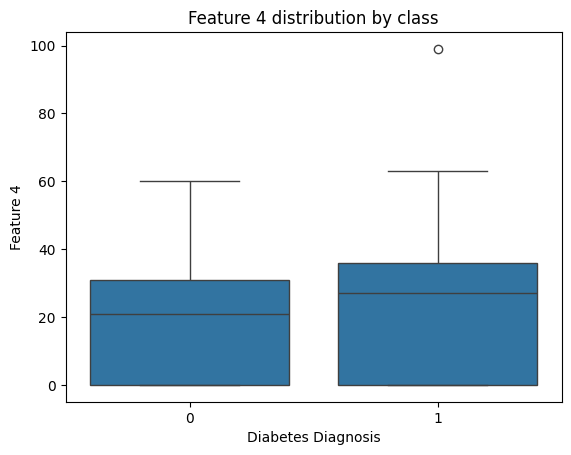

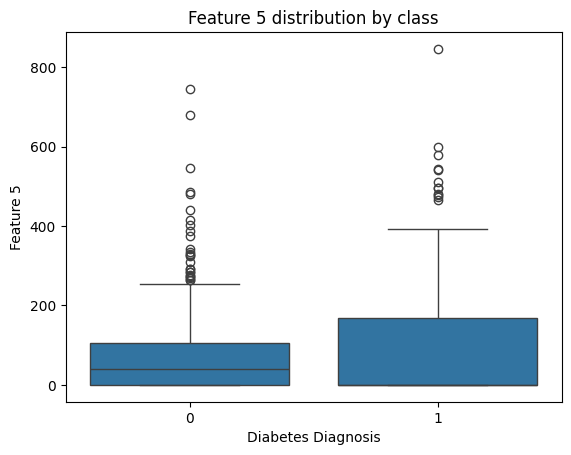

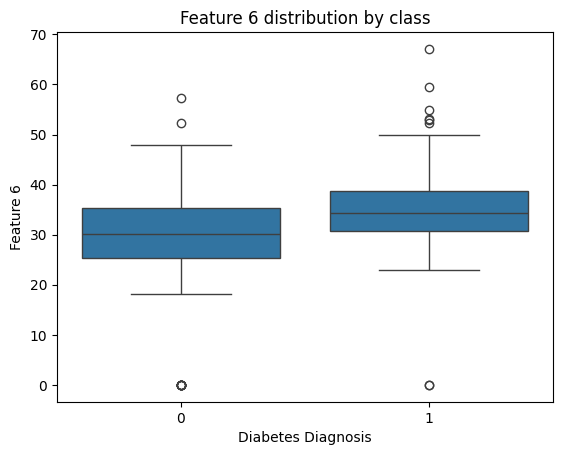

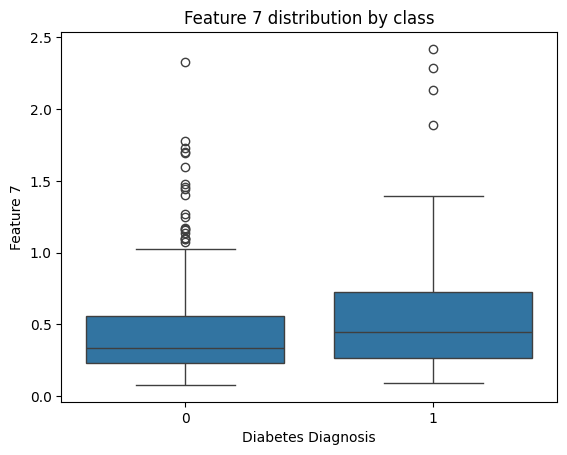

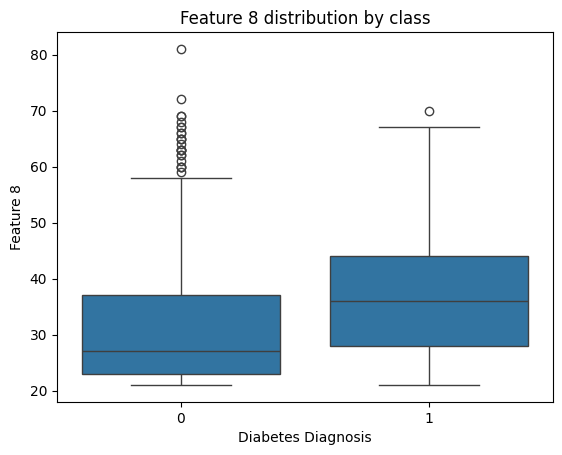

In [9]:
plt.figure(figsize=(12, 6))
for feature in diabetes_dataset.columns[:-1]:  # Excluding classification column
    sns.boxplot(x="Diabetes Diagnosis", y=feature, data=diabetes_dataset)
    plt.title(f"{feature} distribution by class")
    plt.show()


## Splitting the dataset

In [10]:
#turn the dframe into numpy arrays
X = diabetes_dataset.drop(columns = ['Diabetes Diagnosis']).values
y = diabetes_dataset['Diabetes Diagnosis'].values

#split the dataset
def splitting_data(X,y,test_size):
  from sklearn.model_selection import train_test_split
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=42)
  return X_train,X_test,y_train,y_test

In [11]:
X_train,X_test,y_train,y_test = splitting_data(X,y,test_size = 0.2)

In [12]:
print(f"X train shape: {X_train.shape} | X test shape: {X_test.shape}")
print(f"y train shape: {y_train.shape} | y test shape: {y_test.shape}")

X train shape: (614, 8) | X test shape: (154, 8)
y train shape: (614,) | y test shape: (154,)


In [13]:
X.shape,y.shape

((768, 8), (768,))

In [14]:
#turn the numpy into tensors
X_train, X_test = torch.from_numpy(X_train).type(torch.float32),torch.from_numpy(X_test).type(torch.float32)
y_train, y_test = torch.from_numpy(y_train).type(torch.float32),torch.from_numpy(y_test).type(torch.float32)

In [15]:
#type and shape
print(f"X train shape: {X_train.shape} | y_train.shape: {y_train.shape} | X_test shape: {X_test.shape} | y_test shape: {y_test.shape}")

X train shape: torch.Size([614, 8]) | y_train.shape: torch.Size([614]) | X_test shape: torch.Size([154, 8]) | y_test shape: torch.Size([154])


In [16]:
y_train[:10],y_test[:10]

(tensor([0., 1., 0., 0., 1., 0., 1., 1., 0., 0.]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [17]:
#device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Create the model

In [18]:
class ClassificationModelv1(nn.Module):
  def __init__(self):
    super().__init__()

    #layer
    self.layer1 = nn.Linear(in_features=8,
                            out_features=10)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(in_features=10,
                            out_features=1)
  def forward(self,x):
    return self.layer2(self.relu(self.layer1(x)))

In [19]:
#create intances
model_1 = ClassificationModelv1().to(device)

##initial parameter
model_1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.1058, -0.0215,  0.1720, -0.0100, -0.0044,  0.3102, -0.1690, -0.2550],
                      [ 0.2527,  0.1878, -0.2090,  0.1981, -0.2160,  0.2926, -0.2470,  0.3390],
                      [-0.0933,  0.1466, -0.2956,  0.2390,  0.1741, -0.0403,  0.0714,  0.0015],
                      [ 0.0953,  0.3329,  0.0355, -0.0908, -0.0505, -0.0322, -0.2319, -0.1851],
                      [-0.1505, -0.1182,  0.0875,  0.0062,  0.0460, -0.1331,  0.1493, -0.2425],
                      [ 0.0294,  0.1798,  0.3426, -0.2554,  0.1240,  0.1158,  0.3051,  0.0131],
                      [-0.0402, -0.2360, -0.1121, -0.0424, -0.2289, -0.3177,  0.0223, -0.0028],
                      [ 0.2490,  0.1382, -0.2023,  0.3134, -0.2093, -0.1576,  0.2827, -0.2074],
                      [-0.3221,  0.2136,  0.0013, -0.3161, -0.2462, -0.2283, -0.2767, -0.3508],
                      [-0.2274, -0.3207,  0.1607,  0.2276,  0.3347, -0.2518, -0.1351,  0.3143]],
        

In [20]:
#prediction with initial parameter
with torch.inference_mode():
  y_pred = model_1(X_test[:30].to(device))
y_pred

tensor([[-21.0458],
        [-24.0243],
        [-22.7207],
        [-22.8595],
        [-28.1323],
        [-21.0372],
        [-14.4661],
        [-26.1716],
        [-31.8778],
        [-29.3253],
        [-22.8943],
        [-35.2973],
        [-35.4556],
        [-20.4001],
        [-19.2125],
        [-27.0110],
        [-20.2862],
        [-18.8160],
        [-38.3336],
        [-31.1364],
        [-22.6229],
        [-18.6508],
        [-25.0114],
        [-21.2031],
        [-27.5115],
        [-37.0592],
        [-22.4458],
        [-19.2177],
        [-23.2353],
        [-18.1093]], device='cuda:0')

In [21]:
torch.round(torch.sigmoid(y_pred.squeeze()))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], device='cuda:0')

In [22]:
y_test[:30].squeeze()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [23]:
y_pred.shape

torch.Size([30, 1])

In [24]:
y_test.shape

torch.Size([154])

## Pick a loss and optimizer function

In [25]:
# loss functin
loss_fn = nn.BCEWithLogitsLoss()

#pick an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

## Accuracy

In [26]:
def accuracy_fn(y_true,y_pred):

  correct = torch.eq(y_pred,y_true).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## Train the model

In [27]:
X_train,y_train = X_train.squeeze(),y_train.squeeze()
X_test,y_test = X_test.squeeze(),y_test.squeeze()

In [28]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(torch.Size([614, 8]),
 torch.Size([614]),
 torch.Size([154, 8]),
 torch.Size([154]))

In [29]:
torch.manual_seed(42)
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

epoch_list = []
train_Loss = []
test_Loss = []
train_Accuracy = []
test_Accuracy = []
#train the model
epochs = 10000
for epoch in range(epochs):
  model_1.train()
  epoch_list.append(epoch)
  #predict the value:
  train_logits = model_1(X_train).squeeze()
  train_prediction_label = torch.round(torch.sigmoid(train_logits)).squeeze()

  #calculate the loss
  train_loss = loss_fn(train_logits,y_train)
  train_Loss.append(train_loss.detach().cpu().item())
  train_accuracy = accuracy_fn(y_train,train_prediction_label)
  train_Accuracy.append(train_accuracy)
  #optimizer grading setup
  optimizer.zero_grad()

  #back propagation
  train_loss.backward()

  #gradient descent
  optimizer.step()

  #testing mode
  with torch.inference_mode():
    model_1.eval()
    test_logits = model_1(X_test).squeeze()
    test_prediction_label = torch.round(torch.sigmoid(test_logits)).squeeze()


    #loss calculation
    test_loss = loss_fn(test_logits,y_test)
    test_Loss.append(test_loss.detach().cpu().item())
    test_accuracy = accuracy_fn(y_test,test_prediction_label)
    test_Accuracy.append(test_accuracy)
  #printing the result
  if epoch %100 ==0:
    print(f"Epoch: {epoch}  | Train Loss: {train_loss}  | Train accuracy: {train_accuracy}  | Test Loss: {test_loss}  | Test accuracy: {test_accuracy}")


Epoch: 0  | Train Loss: 10.499153137207031  | Train accuracy: 65.30944625407166  | Test Loss: 2.5431313514709473  | Test accuracy: 55.84415584415584
Epoch: 100  | Train Loss: 0.6227447390556335  | Train accuracy: 67.58957654723126  | Test Loss: 0.6272510886192322  | Test accuracy: 64.28571428571429
Epoch: 200  | Train Loss: 0.6043095588684082  | Train accuracy: 69.05537459283387  | Test Loss: 0.634644627571106  | Test accuracy: 66.23376623376623
Epoch: 300  | Train Loss: 0.5916922688484192  | Train accuracy: 69.21824104234527  | Test Loss: 0.6379876136779785  | Test accuracy: 65.5844155844156
Epoch: 400  | Train Loss: 0.5867476463317871  | Train accuracy: 69.38110749185668  | Test Loss: 0.6377266049385071  | Test accuracy: 65.5844155844156
Epoch: 500  | Train Loss: 0.5796437859535217  | Train accuracy: 70.84690553745928  | Test Loss: 0.6327722072601318  | Test accuracy: 66.23376623376623
Epoch: 600  | Train Loss: 0.5745479464530945  | Train accuracy: 71.49837133550488  | Test Loss: 0.6

In [30]:
model_1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-1.4118e-01, -1.1565e-01,  6.5965e-02, -3.1773e-02, -3.8253e-02,
                        2.3168e-01, -1.7003e-01, -3.4696e-01],
                      [ 4.7769e-01, -2.5878e-02, -2.6588e-01, -7.9777e-02,  3.8128e-04,
                       -1.4798e-01, -2.2671e-01,  5.0068e-01],
                      [-2.5724e-01,  2.3338e-02, -3.5185e-01,  3.0817e-01,  2.4739e-02,
                       -5.2407e-02,  8.7674e-02, -1.6086e-01],
                      [ 1.0407e-01,  3.0758e-01, -2.6009e-01, -3.7777e-01, -6.8110e-02,
                        2.1747e-02, -1.9870e-01, -8.1228e-02],
                      [-1.3871e-01, -2.9859e-01,  2.1799e-01,  2.5199e-01,  9.1487e-02,
                       -1.7861e-01,  1.8551e-01, -5.5187e-01],
                      [-2.6300e-01, -4.4102e-02,  4.6310e-01, -1.9047e-01,  2.7455e-02,
                        1.3291e-01,  2.5103e-01, -6.5406e-01],
                      [-4.0171e-02, -2.3601e-01, -1.1208e-01, -

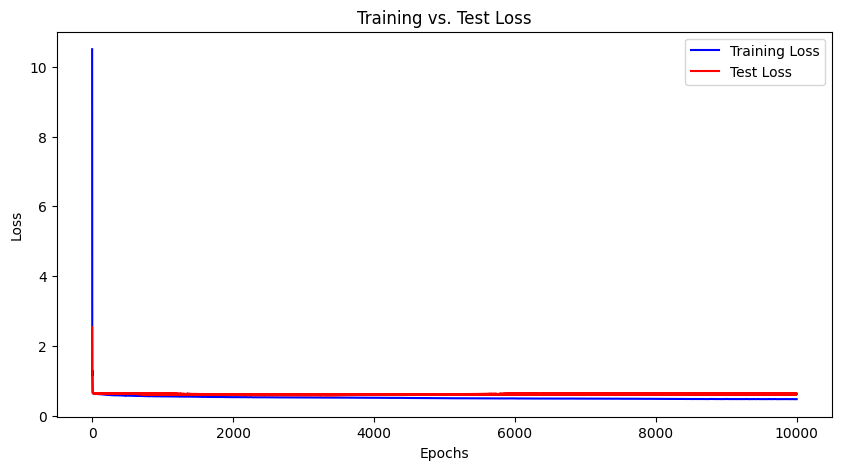

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(epoch_list, train_Loss, label="Training Loss", color="blue")
plt.plot(epoch_list, test_Loss, label="Test Loss", color="red")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Test Loss")
plt.legend()
plt.show()


In [32]:
#save the model
from pathlib import Path
folder_name = Path("Model 1 (Test_size = 0.2)")
folder_name.mkdir(parents = True,exist_ok = True)

#file
file_1 = "test_size = 0.2"
full_path = folder_name/file_1

#save the dict
torch.save(obj=model_1.state_dict(),
           f=full_path)